In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df0=pd.read_excel('2020_Generacion_(kWh).xlsx', skiprows=2)
df1=pd.read_excel('2021_Generacion_(kWh).xlsx', skiprows=2)
df2=pd.read_excel('2022_Generacion_(kWh).xlsx', skiprows=2)
df3=pd.read_excel('2023_Generacion_(kWh).xlsx', skiprows=2)
df4=pd.read_excel('2024_Generacion_(kWh).xlsx', skiprows=2)
df5=pd.read_excel('2025_Generacion_(kWh).xlsx', skiprows=2)

In [5]:
df=pd.concat([df0, df1, df2, df3,df4,df5], ignore_index=True)

In [6]:
print(df.shape)
df.head()


(443710, 34)


,Fecha,Recurso,Código Recurso,Tipo Generación,Combustible,Código Agente,Tipo Despacho,Es Menor,Clasificación,0,...,15,16,17,18,19,20,21,22,23,Version
0,2020-01-01,AGPE - ECOPETROL LA HORMIGA,2XXR,TERMICA,GAS,NRCG,NO DESPACHADO CENTRALMENTE,NO,AUTOG PEQ. ESCALA,226.51,...,269.53,273.34,273.69,227.1,225.26,256.94,155.93,10.91,11.59,TX5
1,2020-01-01,AGUA FRESCA,AFR1,HIDRAULICA,AGUA,ADCG,NO DESPACHADO CENTRALMENTE,SI,NORMAL,7268.40,...,7024.80,6937.20,6874.80,6802.8,6764.40,6729.60,6714.00,5462.40,5950.80,TX5
2,2020-01-01,ALBAN,ALBG,HIDRAULICA,AGUA,EPSG,DESPACHADO CENTRALMENTE,NO,NORMAL,251520.00,...,238880.00,238880.00,238960.00,244786.0,246944.00,248476.00,250296.00,250590.00,250340.00,TX5
3,2020-01-01,ALEJANDRÍA,2SDR,HIDRAULICA,AGUA,GALG,NO DESPACHADO CENTRALMENTE,SI,NORMAL,14861.00,...,8536.00,8338.00,8525.00,10065.0,12892.00,14839.00,14927.00,14982.00,14872.00,TX5
4,2020-01-01,ALTO TULUA,ALTG,HIDRAULICA,AGUA,EPSG,NO DESPACHADO CENTRALMENTE,SI,NORMAL,0.00,...,10908.00,10908.00,10911.60,10908.0,10908.00,10915.20,10915.20,10918.80,10922.40,TX5


In [7]:
CatCols=['Recurso','Código Recurso','Tipo Generación', 'Combustible', 'Código Agente',
         'Tipo Despacho','Es Menor', 'Clasificación', 'Version']
df["Fecha"] = pd.to_datetime(df["Fecha"]).dt.date
for row in CatCols:
    df[row] = df[row].astype('string')
df.dtypes

Fecha                      object
Recurso            string[python]
Código Recurso     string[python]
Tipo Generación    string[python]
Combustible        string[python]
Código Agente      string[python]
Tipo Despacho      string[python]
Es Menor           string[python]
Clasificación      string[python]
0                         float64
1                         float64
2                         float64
3                         float64
4                         float64
5                         float64
6                         float64
7                         float64
8                         float64
9                         float64
10                        float64
11                        float64
12                        float64
13                        float64
14                        float64
15                        float64
16                        float64
17                        float64
18                        float64
19                        float64
20            

In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,4.436740e+05,4.437050e+05,4.437040e+05,4.437080e+05,4.437100e+05,4.437080e+05,4.437060e+05,4.437050e+05,4.437070e+05,4.437020e+05,...,4.437040e+05,4.437080e+05,4.437100e+05,4.437090e+05,4.437070e+05,4.436600e+05,4.437090e+05,4.437080e+05,4.437070e+05,4.437040e+05
mean,3.543437e+04,3.417873e+04,3.329848e+04,3.283492e+04,3.319061e+04,3.415396e+04,3.469711e+04,3.682803e+04,3.903000e+04,4.047177e+04,...,4.347044e+04,4.329915e+04,4.262779e+04,4.194661e+04,4.453043e+04,4.538920e+04,4.443599e+04,4.257946e+04,3.997876e+04,3.743202e+04
std,1.169072e+05,1.154581e+05,1.137040e+05,1.125750e+05,1.136840e+05,1.162712e+05,1.162293e+05,1.192608e+05,1.232267e+05,1.256799e+05,...,1.340823e+05,1.344793e+05,1.337415e+05,1.325565e+05,1.381955e+05,1.414819e+05,1.389878e+05,1.352002e+05,1.288635e+05,1.192097e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.419925e+02,4.954400e+02,6.009950e+02,6.779100e+02,...,6.923225e+02,6.454800e+02,5.603425e+02,4.154700e+02,2.068000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.744410e+03,1.618800e+03,1.591660e+03,1.572060e+03,1.588080e+03,1.622295e+03,2.018935e+03,2.924110e+03,3.813700e+03,4.359600e+03,...,4.476315e+03,4.026355e+03,3.267000e+03,2.335600e+03,2.106030e+03,2.111995e+03,2.081810e+03,2.024000e+03,1.917050e+03,1.900800e+03
75%,1.393013e+04,1.360700e+04,1.335911e+04,1.325340e+04,1.332533e+04,1.360700e+04,1.393630e+04,1.495200e+04,1.618894e+04,1.699478e+04,...,1.692245e+04,1.648800e+04,1.573812e+04,1.524800e+04,1.588895e+04,1.594416e+04,1.567800e+04,1.514083e+04,1.454640e+04,1.441261e+04
max,1.255478e+06,1.255126e+06,1.255563e+06,1.255650e+06,1.255658e+06,1.255478e+06,1.255178e+06,1.254730e+06,1.253882e+06,1.254922e+06,...,1.255769e+06,1.255384e+06,1.255064e+06,1.255178e+06,1.254272e+06,1.255531e+06,1.254837e+06,1.254577e+06,1.255291e+06,1.247481e+06


In [9]:
def count_string_values(df, column):                             # This function returns the number of repetitions per string value in a column
    value_counts = df[column].value_counts()
    result = "\n".join([f"{val}: {count}" for val, count in value_counts.items()])
    return result

In [10]:
for column in CatCols: print(count_string_values(df, column), "\n")

GUAJIRA 2: 2265
GUAJIRA 1: 2013
BETANIA: 1994
MIEL I: 1994
URRA: 1994
SOGAMOSO: 1994
CARLOS LLERAS: 1993
ESCUELA DE MINAS: 1993
AUTOG ARGOS EL CAIRO: 1993
LA REBUSCA: 1993
COCONUCO: 1992
PAJARITO: 1992
MONDOMO: 1992
TERMOMECHERO 6: 1992
TERMOMECHERO 4: 1992
TERMOMECHERO 5: 1991
MIROLINDO: 1991
MULATOS II: 1989
NIMA: 1989
EL QUIMBO: 1989
CELSIA SOLAR BOLIVAR: 1988
AGUA FRESCA: 1988
EL PASO: 1987
SALVAJINA: 1984
AUTOG ECOPETROL ORITO: 1984
AUTOG CELSIA SOLAR YUMBO: 1984
SAN CARLOS: 1981
REMEDIOS: 1981
MORRO AZUL: 1981
CALDERAS: 1978
COELLO: 1976
RIO FRIO II: 1976
AURES BAJO: 1972
FLORIDA: 1970
SANTIAGO: 1968
RIO CALI: 1967
INSULA: 1965
SAN FRANCISCO: 1965
SILVIA: 1963
RIO PALO: 1960
RIO MAYO: 1957
ALBAN: 1955
SAN MIGUEL: 1953
MAGALLO: 1947
PUENTE GUILLERMO: 1944
LUZMA II: 1939
LUZMA I: 1938
RIO FRIO I: 1937
EL BOSQUE: 1935
HIDROMONTAÑITAS: 1935
EL POPAL: 1933
LA VUELTA: 1932
JUAN GARCIA: 1930
LA HERRADURA: 1923
CUCUANA: 1922
GUAVIO: 1921
PROVIDENCIA: 1919
LAS PALMAS: 1908
PLAYAS: 1906
BE

In [11]:
df['Tipo Generación'] = df['Tipo Generación'].str.replace('Solar', 'SOLAR')

In [12]:
print(df.isna().sum())

Fecha               0
Recurso             0
Código Recurso      0
Tipo Generación     0
Combustible         0
Código Agente       0
Tipo Despacho       0
Es Menor            0
Clasificación       0
0                  36
1                   5
2                   6
3                   2
4                   0
5                   2
6                   4
7                   5
8                   3
9                   8
10                  2
11                  2
12                  6
13                  3
14                  6
15                  2
16                  0
17                  1
18                  3
19                 50
20                  1
21                  2
22                  3
23                  6
Version             0
dtype: int64


In [13]:
# Se reemplaza los valores NaN por el promedio de los valores de las columnas en las horas adyacentes
num_cols = df.select_dtypes(include=[np.number]).columns
n = len(num_cols)

for i, col in enumerate(num_cols):
    nan_idx = df[col].isna()
    prev_col = num_cols[(i - 1) % n]
    next_col = num_cols[(i + 1) % n]
    df.loc[nan_idx, col] = (df.loc[nan_idx, prev_col] + df.loc[nan_idx, next_col]) / 2

In [14]:
print(df.isna().values.any())
df.isnull().values.any()  # Verifica si hay valores NaN restantes

False


np.False_

In [15]:
#This function checks for duplicated considering all columns except by the ones specified in exclude_columns
def count_duplicates_excluding(df, exclude_columns,bool):
    check_df = df.drop(columns=exclude_columns)
    duplicates = check_df[check_df.duplicated(keep=bool)]
    return len(duplicates), duplicates

In [16]:
count, dup_rows = count_duplicates_excluding(df, exclude_columns=[],bool='first')
print(f"Number of extra duplicated rows : {count}")

Number of extra duplicated rows : 0


In [17]:
# Assuming your date column is 'Fecha' and hour columns are strings '0' to '23'
hour_cols = [str(i) for i in range(24)]

# Group by date and sum the hour columns
df_grouped = df.groupby("Fecha")[hour_cols].sum().reset_index()

# Find max, min and their corresponding hour columns
df_grouped["max"] = df_grouped[hour_cols].max(axis=1)
df_grouped["hora max"] = df_grouped[hour_cols].idxmax(axis=1)
df_grouped["min"] = df_grouped[hour_cols].min(axis=1)
df_grouped["hora min"] = df_grouped[hour_cols].idxmin(axis=1)

# Show the result
print(df_grouped.shape)
df_grouped.head()

(1994, 29)


,Fecha,0,1,2,3,4,5,6,7,8,...,18,19,20,21,22,23,max,hora max,min,hora min
0,2020-01-01,6560913.52,6446463.08,6275363.53,6136344.04,6019163.39,5906660.41,5494256.05,5530111.74,5736928.70,...,7211704.76,7345428.20,7247168.32,7008309.03,6738712.48,6528311.92,7345428.20,19,5494256.05,6
1,2020-01-02,6218437.47,5997987.41,5960043.62,5864780.97,5939757.24,6043793.30,6132471.98,6617858.14,7138392.50,...,8626887.93,8749925.94,8567331.15,8218948.29,7699504.81,7185385.20,8749925.94,19,5864780.97,3
2,2020-01-03,7030494.04,6755853.19,6579871.92,6474155.54,6557636.68,6650389.44,6670846.84,7113511.27,7510124.14,...,8916070.29,9087375.44,8830957.57,8431787.77,7909945.94,7444364.15,9087375.44,19,6474155.54,3
3,2020-01-04,6961727.91,6650506.90,6445090.40,6390389.34,6352471.34,6413632.98,6387181.05,6779002.12,7307894.98,...,8636104.54,8849029.45,8637024.32,8258228.85,7760836.51,7280781.35,8849029.45,19,6352471.34,4
4,2020-01-05,6863472.35,6559808.75,6350681.97,6191213.10,6100979.77,6082875.43,5865627.62,6074919.00,6405223.48,...,7869148.42,8127496.56,7995835.50,7689706.19,7318922.15,6881006.74,8127496.56,19,5865627.62,6


In [18]:
# Calculate the average value among the 24 hour columns for each day
df_grouped["avg"] = df_grouped[hour_cols].mean(axis=1)

# Show the result with the new column
print(df_grouped[["max", "hora max", "min", "hora min", "avg"]].head())
# ...existing code...

          max hora max         min hora min           avg
0  7345428.20       19  5494256.05        6  6.399262e+06
1  8749925.94       19  5864780.97        3  7.389255e+06
2  9087375.44       19  6474155.54        3  7.795950e+06
3  8849029.45       19  6352471.34        4  7.552224e+06
4  8127496.56       19  5865627.62        6  6.910913e+06


In [19]:
df_grouped[["hora max","hora min"]] = df_grouped[["hora max","hora min"]] .astype(int)
df_avg=df_grouped[["max", "hora max", "min", "hora min"]].mean()
df_avg

max         1.011747e+07
hora max    1.858375e+01
min         7.242332e+06
hora min    3.637914e+00
dtype: float64

In [20]:
# 1. Sum all hours per day
hour_cols = [str(i) for i in range(24)]
df_grouped["consumo total dia"] = df_grouped[hour_cols].sum(axis=1)

# 2. Extract year and month for grouping
df_grouped["year_month"] = pd.to_datetime(df_grouped["Fecha"]).dt.to_period("M")

# 3. Find max and min per month
result = []

for period, group in df_grouped.groupby("year_month"):
    # Max
    idx_max = group["consumo total dia"].idxmax()
    max_row = group.loc[idx_max]
    # Min
    idx_min = group["consumo total dia"].idxmin()
    min_row = group.loc[idx_min]
    result.append({
        "mes": str(period),
        "generacion total mes": group["consumo total dia"].sum(),
        "día de maxima generación": max_row["Fecha"],
        "máxima generación": max_row["consumo total dia"],
        "día de minima generación": min_row["Fecha"],
        "minima generación": min_row["consumo total dia"]
    })

df_monthly = pd.DataFrame(result)
print(df_monthly.shape)
df_monthly.head()

(66, 6)


,mes,generacion total mes,día de maxima generación,máxima generación,día de minima generación,minima generación
0,2020-01,5.989849e+09,2020-01-17,2.096752e+08,2020-01-01,1.535823e+08
1,2020-02,5.877768e+09,2020-02-13,2.147802e+08,2020-02-23,1.752547e+08
2,2020-03,5.931088e+09,2020-03-06,2.161534e+08,2020-03-29,1.648771e+08
3,2020-04,4.998301e+09,2020-04-30,1.764955e+08,2020-04-19,1.532060e+08
4,2020-05,5.416245e+09,2020-05-21,1.841228e+08,2020-05-31,1.528921e+08


In [21]:
# Extract year from 'mes' column (format 'YYYY-MM')
df_monthly["year"] = df_monthly["mes"].str[:4]

result_year = []

for year, group in df_monthly.groupby("year"):
    # Max
    idx_max = group["máxima generación"].idxmax()
    max_row = group.loc[idx_max]
    # Min
    idx_min = group["minima generación"].idxmin()
    min_row = group.loc[idx_min]
    #Max_month
    idx_max_month = group["generacion total mes"].idxmax()
    max_month_row = group.loc[idx_max_month]
    #Min_month  
    idx_min_month = group["generacion total mes"].idxmin()
    min_month_row = group.loc[idx_min_month]
    result_year.append({
        "año": year,
        "mes de maxima generación": max_month_row["mes"],
        "max total mes": max_month_row["generacion total mes"],

        "día de maxima generación": max_row["día de maxima generación"],
        "máxima generación día": max_row["máxima generación"],

        "mes de minima generación": min_month_row["mes"],
        "min total mes": min_month_row["generacion total mes"],

        "día de minima generación": min_row["día de minima generación"],
        "minima generación día": min_row["minima generación"]
    })

df_yearly = pd.DataFrame(result_year)
df_yearly

,año,mes de maxima generación,max total mes,día de maxima generación,máxima generación día,mes de minima generación,min total mes,día de minima generación,minima generación día
0,2020,2020-12,6.138993e+09,2020-03-06,2.161534e+08,2020-04,4.998301e+09,2020-05-31,1.528921e+08
1,2021,2021-10,6.621680e+09,2021-10-07,2.300313e+08,2021-02,5.656791e+09,2021-01-01,1.555916e+08
2,2022,2022-10,6.633067e+09,2022-10-04,2.303027e+08,2022-02,5.882726e+09,2022-01-01,1.604261e+08
3,2023,2023-09,7.122679e+09,2023-09-22,2.504391e+08,2023-02,6.198945e+09,2023-04-07,1.759491e+08
4,2024,2024-08,7.251143e+09,2024-09-19,2.501643e+08,2024-06,6.517558e+09,2024-01-01,1.761535e+08
5,2025,2025-05,7.096962e+09,2025-02-07,2.476510e+08,2025-06,3.617676e+09,2025-01-01,1.788197e+08


In [22]:
# Agrupa por 'Tipo Generación' y suma la generación total (suma de todas las horas)
hour_cols = [str(i) for i in range(24)]
df["generacion_total"] = df[hour_cols].sum(axis=1)

# 1. Generación total por tipo
tipo_group = df.groupby("Tipo Generación")["generacion_total"].sum().reset_index()

# 2. Porcentaje por combustible
combustible_pivot = (
    df.pivot_table(index="Tipo Generación", 
                  columns="Combustible", 
                  values="generacion_total", 
                  aggfunc="sum", 
                  fill_value=0)
)
combustible_percent = combustible_pivot.div(combustible_pivot.sum(axis=1), axis=0) * 100
combustible_percent = combustible_percent.add_prefix("Combustible_%_")

# 3. Porcentaje por clasificación
clasif_pivot = (
    df.pivot_table(index="Tipo Generación", 
                  columns="Clasificación", 
                  values="generacion_total", 
                  aggfunc="sum", 
                  fill_value=0)
)
clasif_percent = clasif_pivot.div(clasif_pivot.sum(axis=1), axis=0) * 100
clasif_percent = clasif_percent.add_prefix("Clasificacion_%_")

# 4. Porcentaje Es Menor = SI
es_menor_si = (
    df[df["Es Menor"] == "SI"]
    .groupby("Tipo Generación")["generacion_total"]
    .sum() / tipo_group.set_index("Tipo Generación")["generacion_total"]
) * 100
es_menor_si = es_menor_si.rename("Es Menor SI %").fillna(0)

# 5. Porcentaje Despachado Centralmente
despachado_central = (
    df[df["Tipo Despacho"] == "DESPACHADO CENTRALMENTE"]
    .groupby("Tipo Generación")["generacion_total"]
    .sum() / tipo_group.set_index("Tipo Generación")["generacion_total"]
) * 100
despachado_central = despachado_central.rename("Despachado Centralmente %").fillna(0)

# 6. Unir todo en un solo DataFrame
summary = tipo_group.set_index("Tipo Generación")
summary = summary.join(combustible_percent)
summary = summary.join(clasif_percent)
summary = summary.join(es_menor_si)
summary = summary.join(despachado_central)

summary = summary.reset_index()
summary

,Tipo Generación,generacion_total,Combustible_%_ACPM,Combustible_%_AGUA,Combustible_%_BAGAZO,Combustible_%_BIOGAS,Combustible_%_BIOMASA,Combustible_%_CARBON,Combustible_%_COMBUSTOLEO,Combustible_%_CRUDO,...,Clasificacion_%_AUTOG PEQ. ESCALA,Clasificacion_%_AUTOGENERADOR,Clasificacion_%_CICLO COMBINADO,Clasificacion_%_COGENERADOR,Clasificacion_%_FILO AGUA ESPECIAL,Clasificacion_%_FILO DE AGUA,Clasificacion_%_GEN. DISTRIBUIDA,Clasificacion_%_NORMAL,Es Menor SI %,Despachado Centralmente %
0,COGENERADOR,4.314097e+09,0.000000,0.0,98.578979,0.0000,0.000000,1.342491,0.000000,0.000000,...,0.000000,0.000000,0.000000,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,EOLICA,5.696326e+08,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,100.000000,100.000000,0.000000
2,HIDRAULICA,3.192378e+11,0.000000,100.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.315106,0.000000,0.0,0.397148,5.498105,0.075331,93.714310,7.578730,92.203787
3,SOLAR,7.417869e+09,0.000000,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.024570,1.982888,0.000000,0.0,0.000000,0.000000,0.771031,97.221510,43.375426,53.480651
4,TERMICA,9.051720e+10,1.283732,0.0,0.102943,0.0382,0.015713,37.530758,0.231468,0.051412,...,0.039523,1.264679,36.423387,0.0,0.000000,0.000000,0.000000,62.272411,4.182270,94.678253


In [23]:
# Asegúrate de tener la columna de año
df["año"] = pd.to_datetime(df["Fecha"]).dt.year

# 1. Generación total por tipo y año
tipo_group = df.groupby(["año", "Tipo Generación"])["generacion_total"].sum().reset_index()

# 2. Porcentaje por combustible
combustible_pivot = (
    df.pivot_table(index=["año", "Tipo Generación"], 
                  columns="Combustible", 
                  values="generacion_total", 
                  aggfunc="sum", 
                  fill_value=0)
)
combustible_percent = combustible_pivot.div(combustible_pivot.sum(axis=1), axis=0) * 100
combustible_percent = combustible_percent.add_prefix("Combustible_%_")

# 3. Porcentaje por clasificación
clasif_pivot = (
    df.pivot_table(index=["año", "Tipo Generación"], 
                  columns="Clasificación", 
                  values="generacion_total", 
                  aggfunc="sum", 
                  fill_value=0)
)
clasif_percent = clasif_pivot.div(clasif_pivot.sum(axis=1), axis=0) * 100
clasif_percent = clasif_percent.add_prefix("Clasificacion_%_")

# 4. Porcentaje Es Menor = SI
es_menor_si = (
    df[df["Es Menor"] == "SI"]
    .groupby(["año", "Tipo Generación"])["generacion_total"]
    .sum() / tipo_group.set_index(["año", "Tipo Generación"])["generacion_total"]
) * 100
es_menor_si = es_menor_si.rename("Es Menor SI %").fillna(0)

# 5. Porcentaje Despachado Centralmente
despachado_central = (
    df[df["Tipo Despacho"] == "DESPACHADO CENTRALMENTE"]
    .groupby(["año", "Tipo Generación"])["generacion_total"]
    .sum() / tipo_group.set_index(["año", "Tipo Generación"])["generacion_total"]
) * 100
despachado_central = despachado_central.rename("Despachado Centralmente %").fillna(0)

# 6. Unir todo en un solo DataFrame
summary = tipo_group.set_index(["año", "Tipo Generación"])
summary = summary.join(combustible_percent)
summary = summary.join(clasif_percent)
summary = summary.join(es_menor_si)
summary = summary.join(despachado_central)

summary = summary.reset_index()
summary

,año,Tipo Generación,generacion_total,Combustible_%_ACPM,Combustible_%_AGUA,Combustible_%_BAGAZO,Combustible_%_BIOGAS,Combustible_%_BIOMASA,Combustible_%_CARBON,Combustible_%_COMBUSTOLEO,...,Clasificacion_%_AUTOG PEQ. ESCALA,Clasificacion_%_AUTOGENERADOR,Clasificacion_%_CICLO COMBINADO,Clasificacion_%_COGENERADOR,Clasificacion_%_FILO AGUA ESPECIAL,Clasificacion_%_FILO DE AGUA,Clasificacion_%_GEN. DISTRIBUIDA,Clasificacion_%_NORMAL,Es Menor SI %,Despachado Centralmente %
0,2020,COGENERADOR,7.826550e+08,0.000000,0.0,92.561826,0.000000,0.000000,7.399984,0.000000,...,0.000000,0.000000,0.000000,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2020,EOLICA,1.011661e+07,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,100.000000,100.000000,0.000000
2,2020,HIDRAULICA,4.983735e+10,0.000000,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.202235,0.000000,0.0,0.000000,7.122517,0.000000,92.675248,8.227887,91.569878
3,2020,SOLAR,1.907960e+08,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.392816,0.000000,0.0,0.000000,0.000000,0.000000,96.607184,25.810977,71.352736
4,2020,TERMICA,1.850264e+10,0.072786,0.0,0.000000,0.007287,0.000000,45.980447,0.095057,...,0.010956,1.227308,13.830745,0.0,0.000000,0.000000,0.000000,84.930991,5.347097,93.415813
5,2021,COGENERADOR,7.862902e+08,0.000000,0.0,99.948130,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,2021,EOLICA,6.046202e+07,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,100.000000,100.000000,0.000000
7,2021,HIDRAULICA,6.049598e+10,0.000000,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.330146,0.000000,0.0,0.000000,6.266633,0.008959,93.394262,8.572921,91.249394
8,2021,SOLAR,3.230169e+08,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.713806,0.000000,0.0,0.000000,0.000000,0.000000,96.286194,58.516704,39.940037
9,2021,TERMICA,1.226780e+10,0.096389,0.0,0.054844,0.036965,0.000000,32.765893,0.124910,...,0.052947,1.061548,43.949292,0.0,0.000000,0.000000,0.000000,54.936213,4.813787,94.121088


In [24]:
# Asegúrate de tener la columna de año
df["año"] = pd.to_datetime(df["Fecha"]).dt.year

# 1. Generación total por recurso y año
recurso_group = df.groupby(["año", "Recurso"])["generacion_total"].sum().reset_index()

# 2. Para cada año, selecciona los 10 recursos con mayor generación y calcula el porcentaje
top_recursos_por_anio = {}

for year, group in recurso_group.groupby("año"):
    total_anual = group["generacion_total"].sum()
    top10 = group.nlargest(10, "generacion_total").copy()
    top10["porcentaje"] = (top10["generacion_total"] / total_anual) * 100
    # Index: año, columns: recurso, values: porcentaje
    df_top = top10.set_index("Recurso")["porcentaje"].to_frame().T
    df_top.index = [year]
    top_recursos_por_anio[year] = df_top

# 3. Si quieres ver el de un año específico, por ejemplo 2023:
#print(top_recursos_por_anio[2023])

# 4. Si quieres unir todos los años en un solo DataFrame (opcional):
df_top_all_years = pd.concat(top_recursos_por_anio.values())
df_top_all_years.fillna(0, inplace=True)  # Los recursos que no aparecen en un año tendrán 0%
df_top_all_years

Recurso,SAN CARLOS,GUAVIO,SOGAMOSO,PORCE III,PAGUA,GUATRON,CHIVOR,GUATAPE,TEBSAB,EL QUIMBO,TEBSAB CC,BETANIA,PORCE II,ITUANGO,FLORES 4 CC
2020,8.652001,7.686526,5.537353,4.789924,4.348995,3.688109,3.684969,3.257954,2.817857,2.716587,0.000000,0.000000,0.000000,0.000000,0.000000
2021,10.353547,5.753663,7.058929,6.202422,2.971193,3.188583,6.172387,4.701457,0.000000,0.000000,4.520200,3.708896,0.000000,0.000000,0.000000
2022,10.326068,5.850369,7.254342,6.461070,3.763575,3.734313,5.401168,5.015857,0.000000,0.000000,3.928613,0.000000,2.958365,0.000000,0.000000
2023,7.475343,7.127930,6.316127,4.343578,4.643837,3.228721,5.163639,3.568026,0.000000,0.000000,4.548858,0.000000,0.000000,5.518768,0.000000
2024,6.252599,5.524192,4.971217,3.872247,4.100072,3.203196,3.549992,0.000000,0.000000,0.000000,4.846905,0.000000,0.000000,8.404331,3.147352
2025,8.157181,6.904656,6.523781,4.430891,3.977152,0.000000,4.238719,3.806133,0.000000,0.000000,2.641512,2.732453,0.000000,10.620543,0.000000


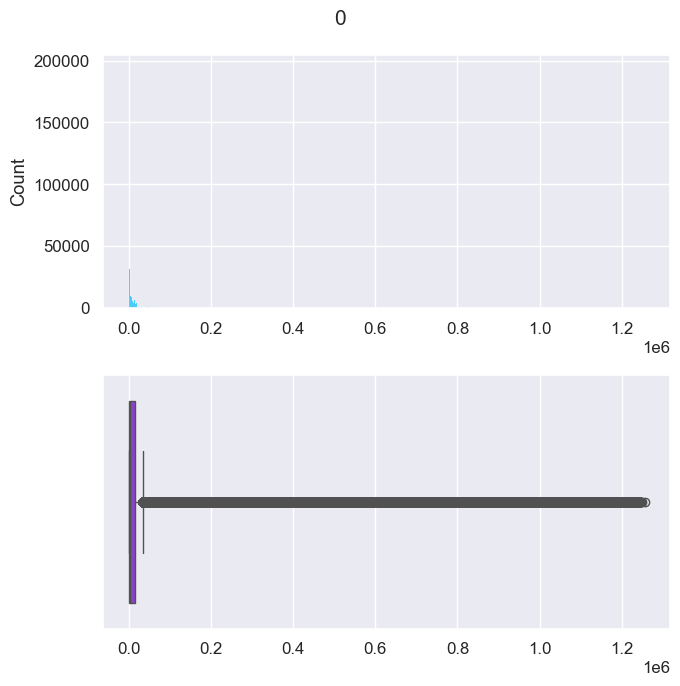

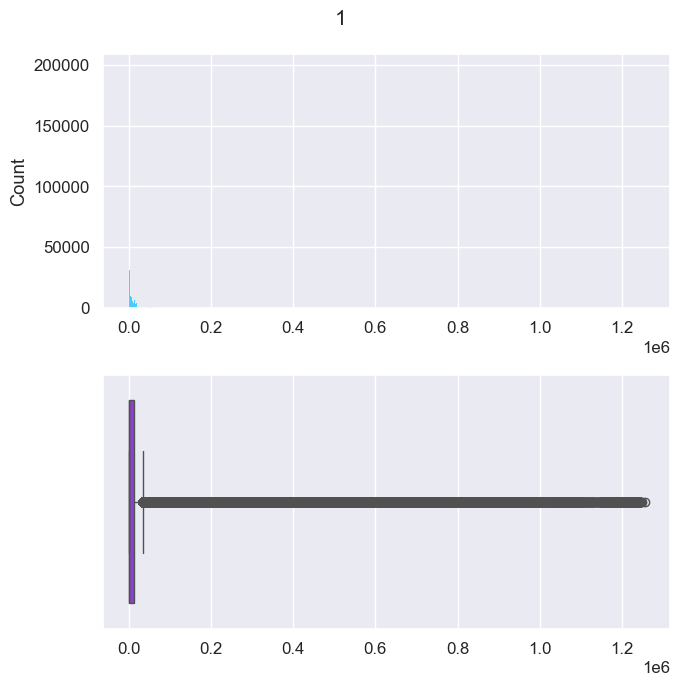

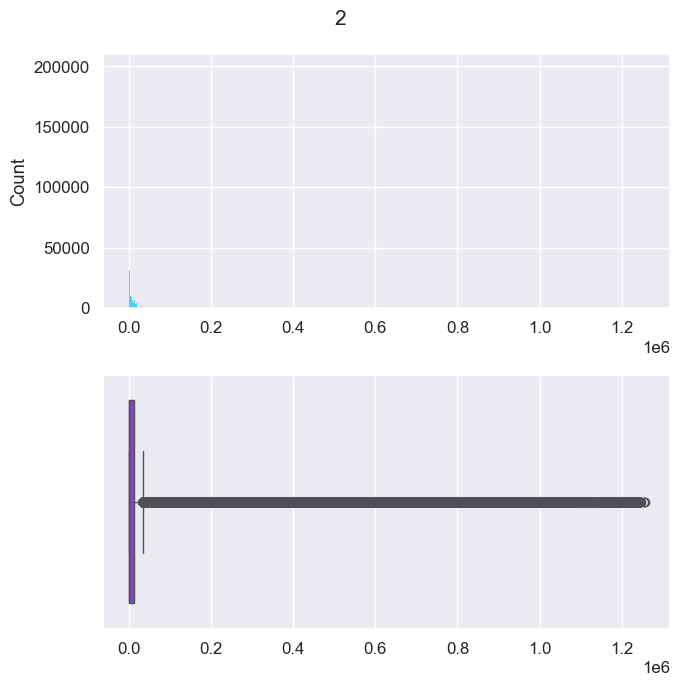

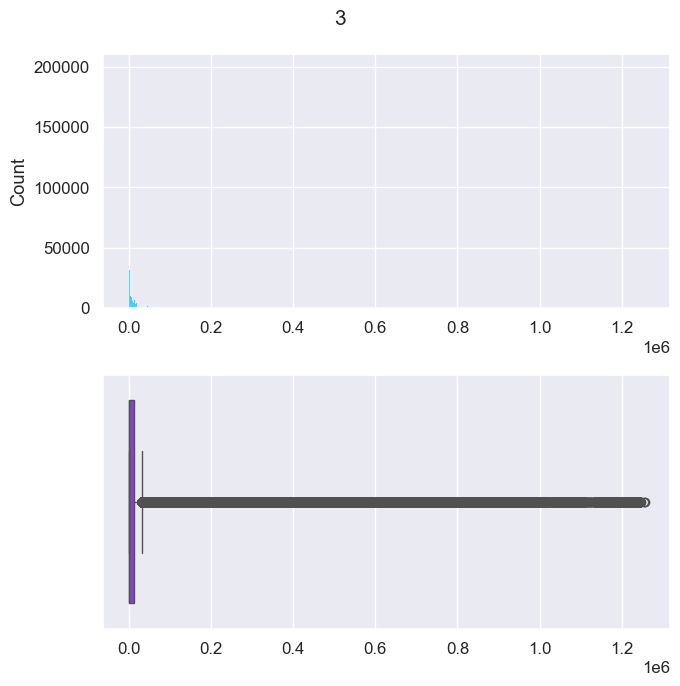

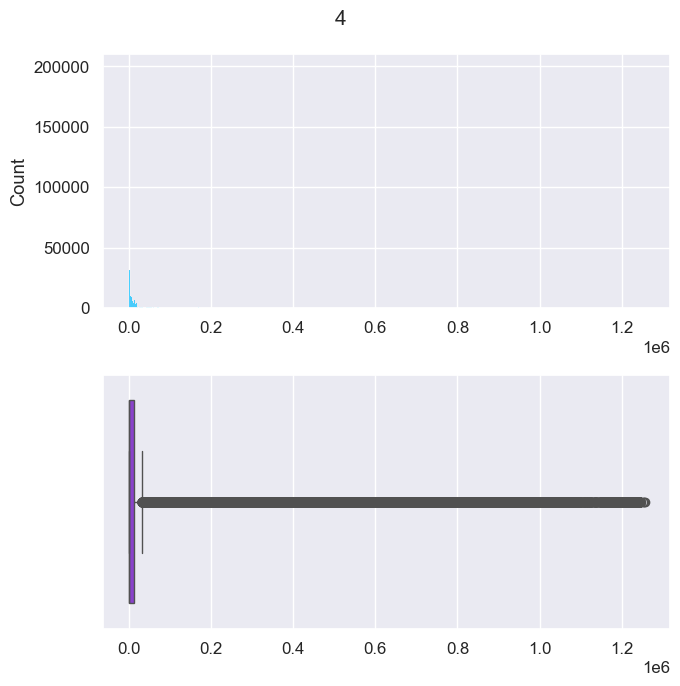

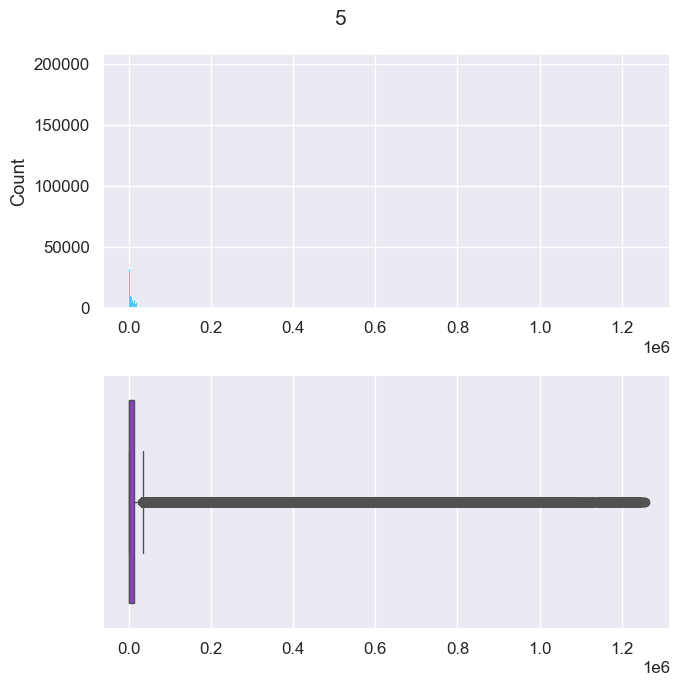

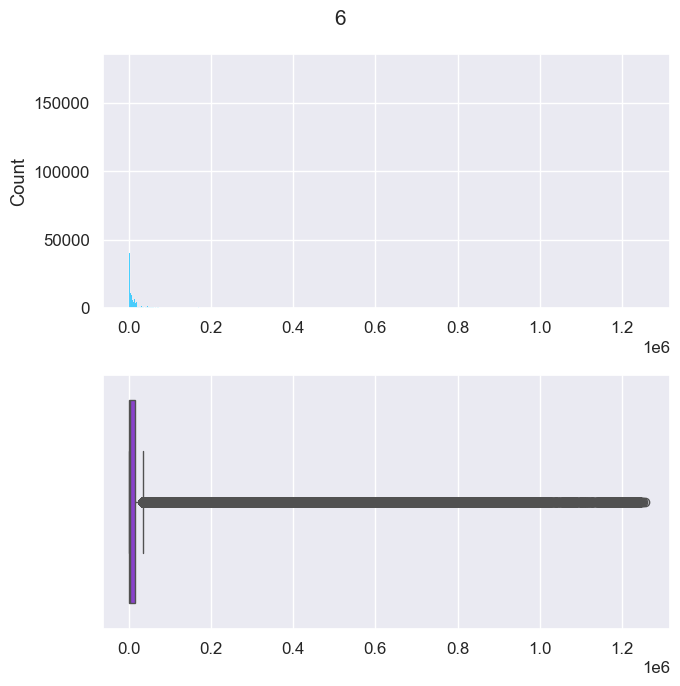

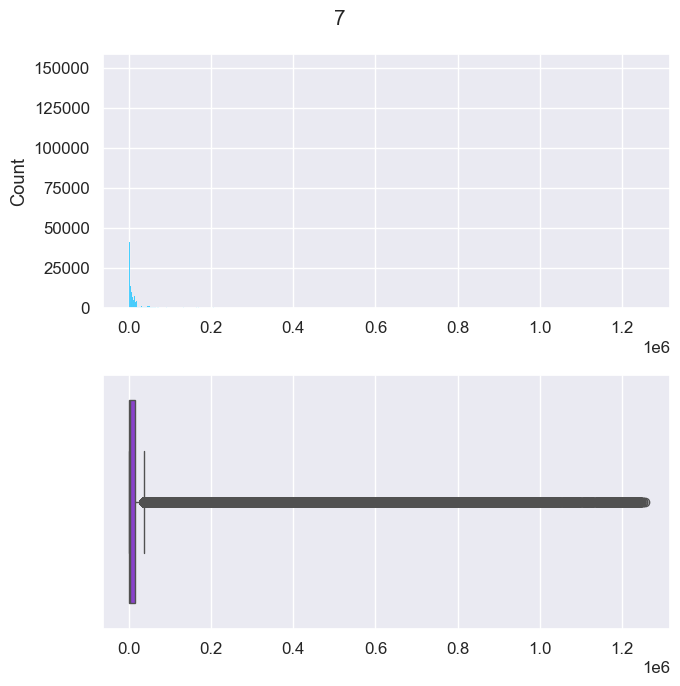

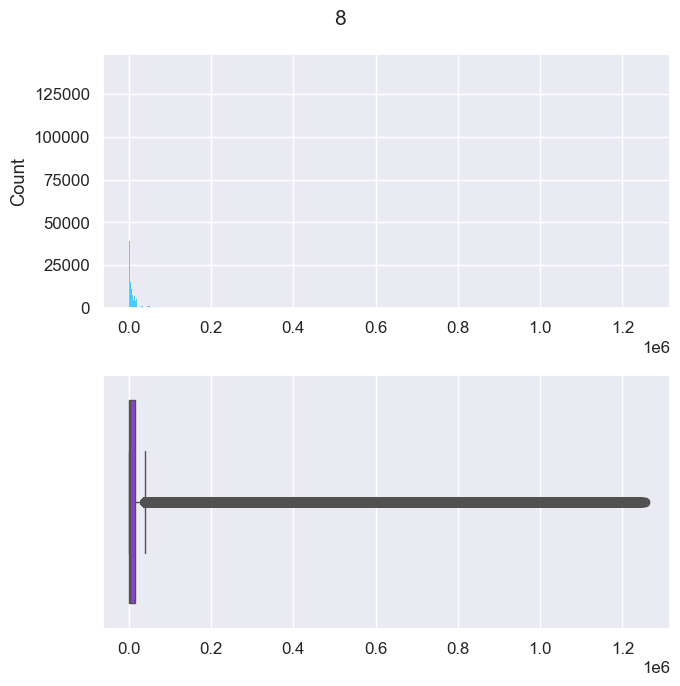

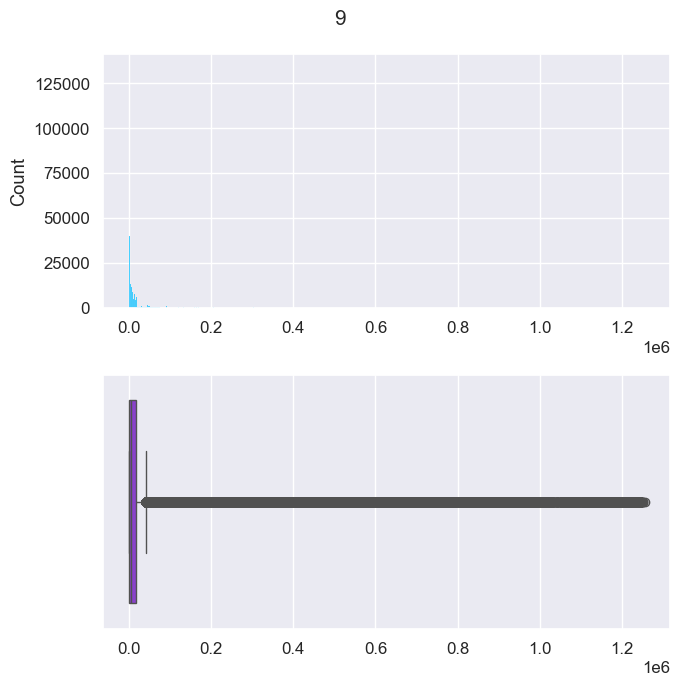

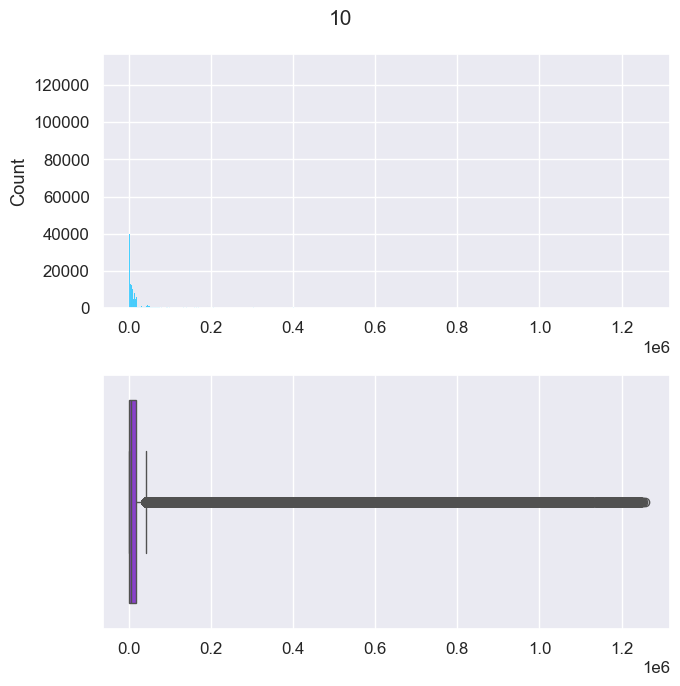

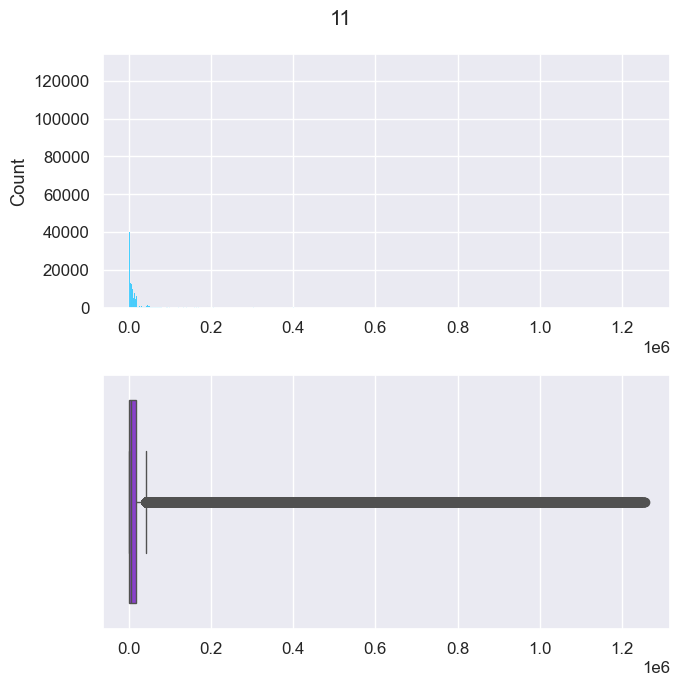

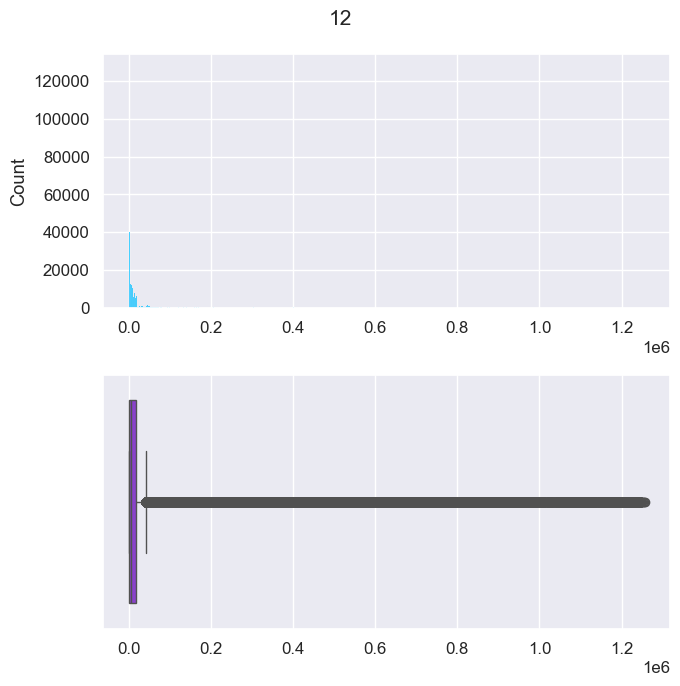

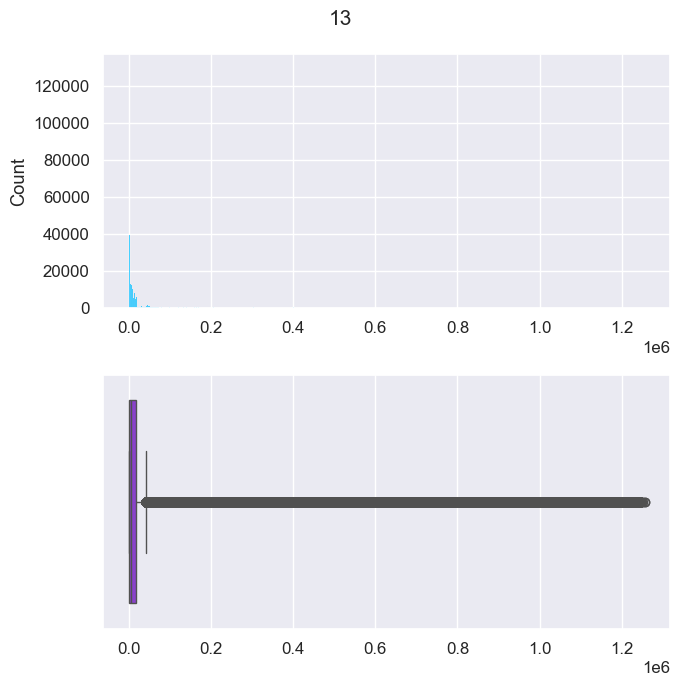

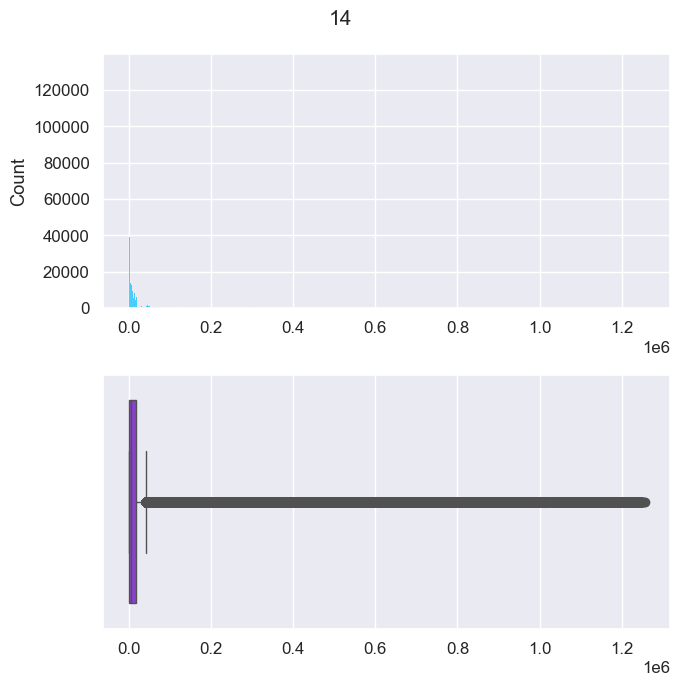

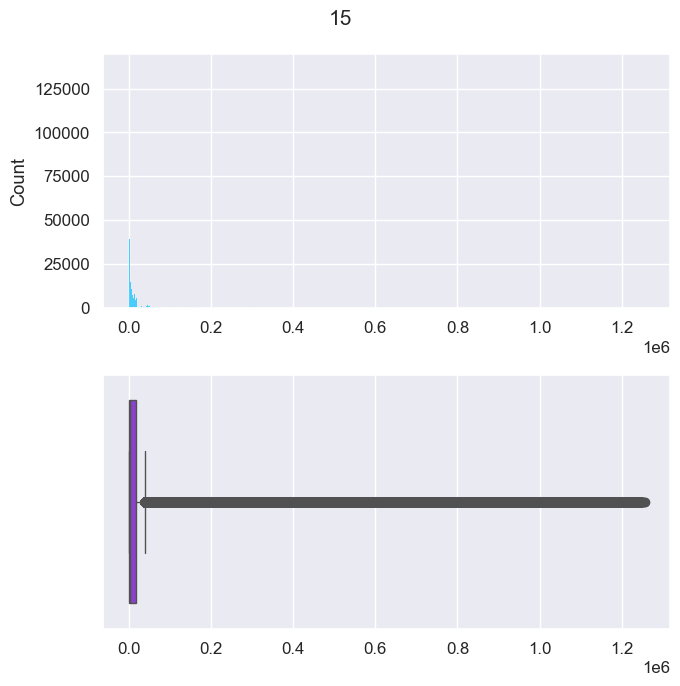

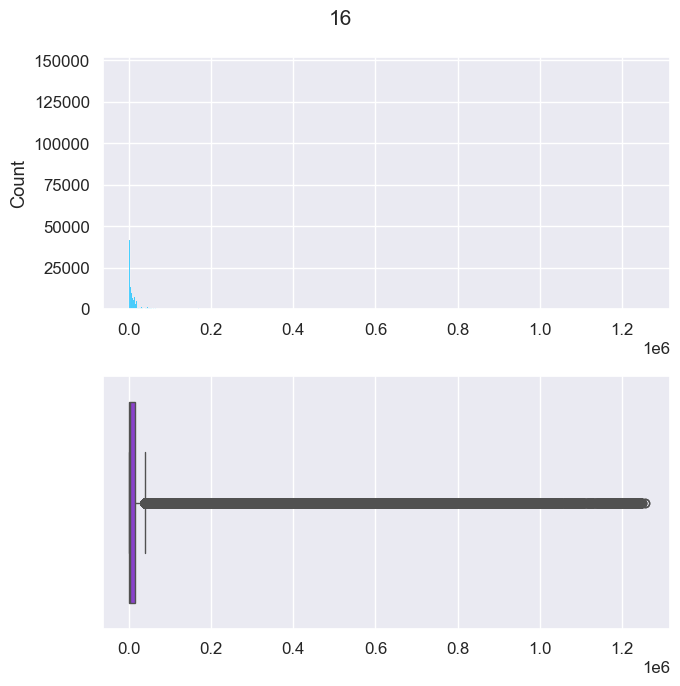

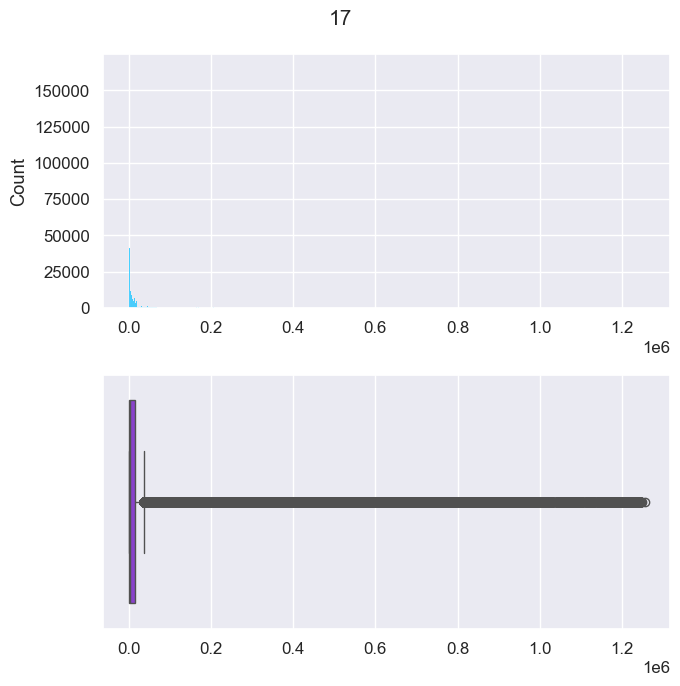

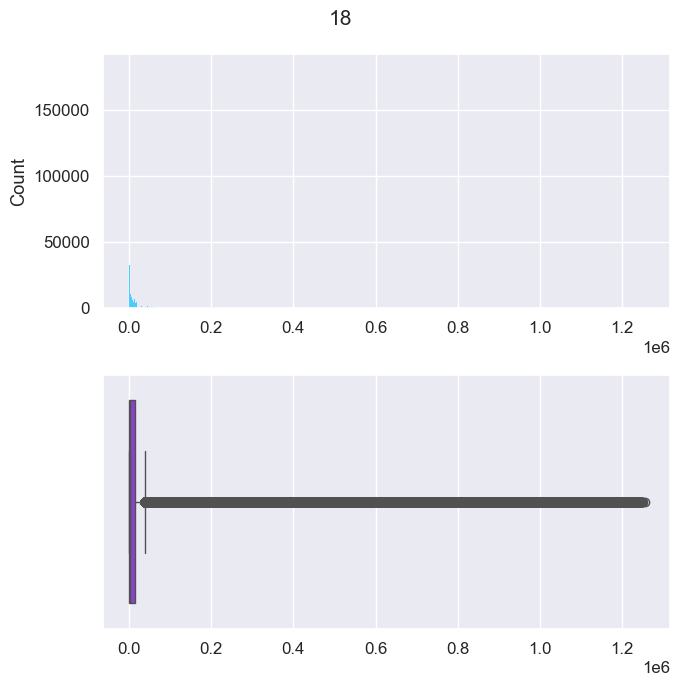

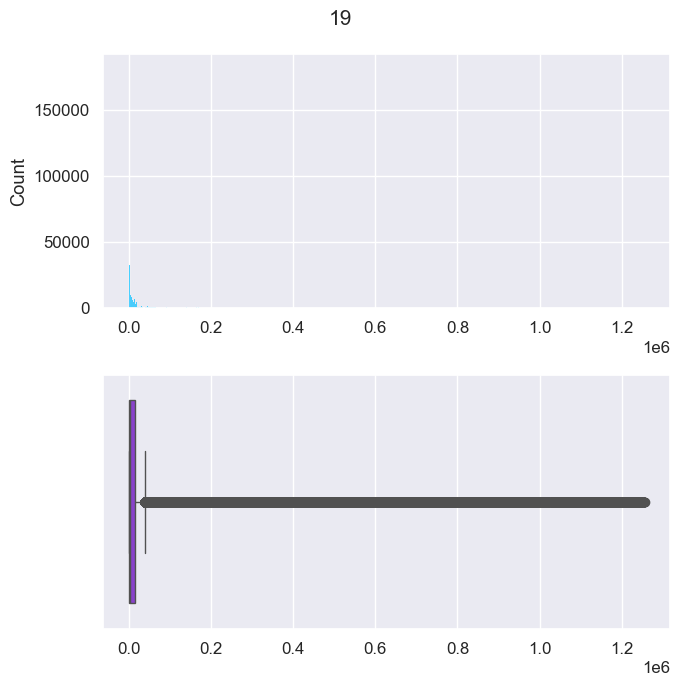

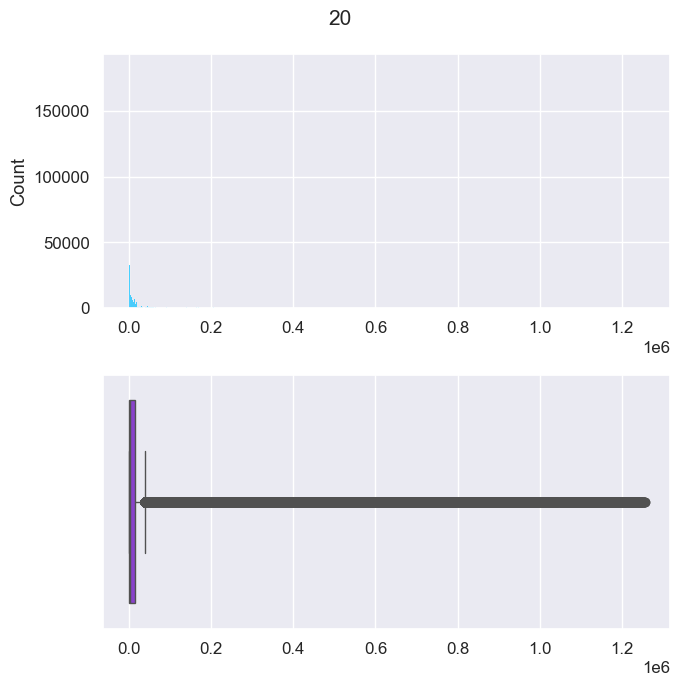

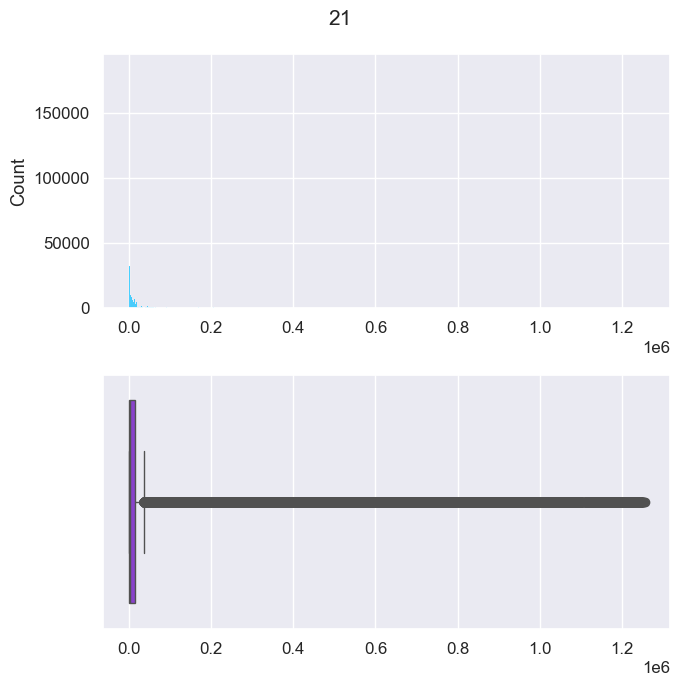

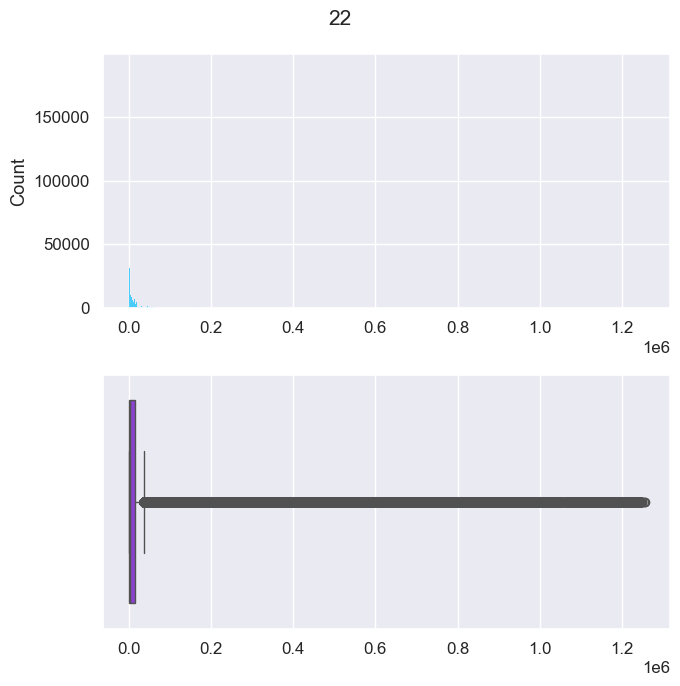

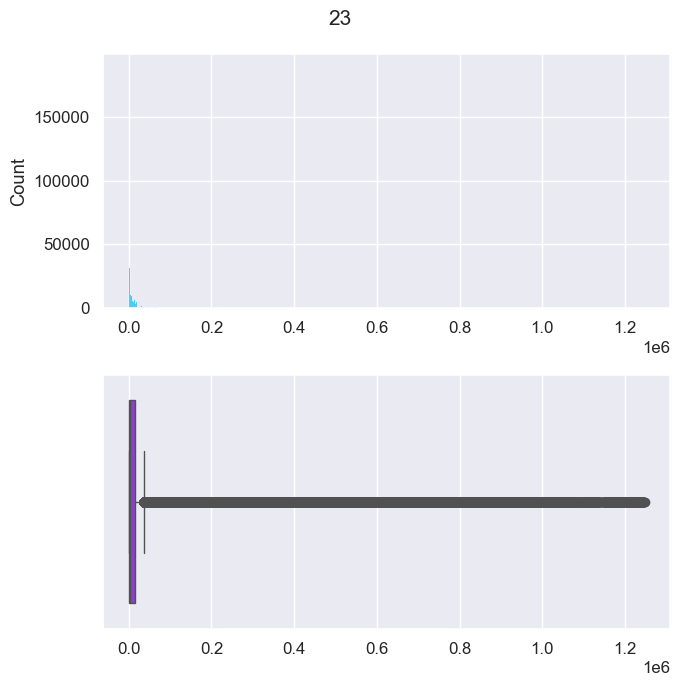

In [25]:
sns.set_theme(font_scale=1.1)
for col in hour_cols:
    fig,ax = plt.subplots(2,1,figsize=(7,7),tight_layout=True)
    fig.suptitle(col,size=15)
    sns.histplot(x=df[col],ax=ax[0],color='deepskyblue')
    sns.boxplot(x=df[col],ax=ax[1],color='blueviolet')
    ax[0].set_xlabel("")
    ax[1].set_xlabel("")
    plt.show()

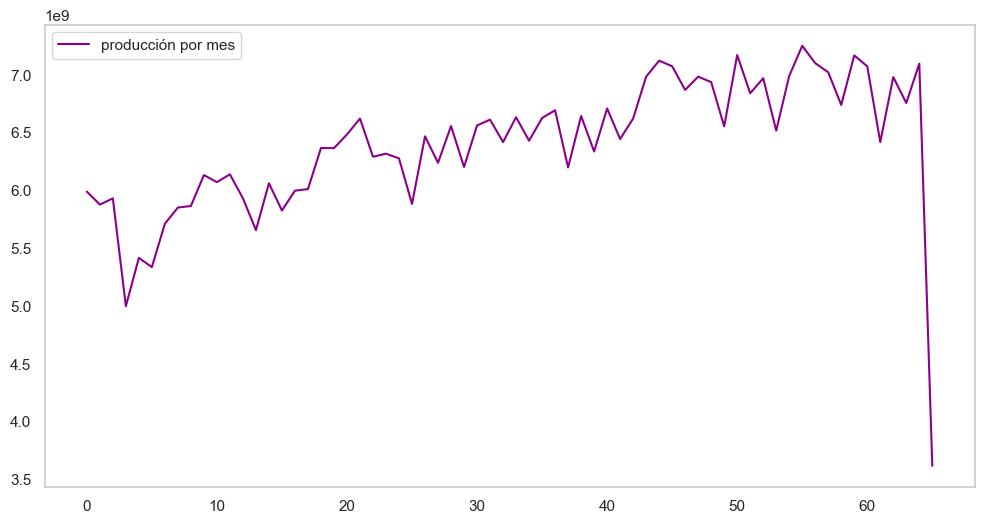

In [37]:
plt.figure(figsize=(12, 6))
ax1 = df_monthly['generacion total mes'].plot(style='-', label='producción por mes', color='darkmagenta')
ax1.grid(False)
ax1.tick_params(axis='y')
ax1.legend()


C:\Users\Berlitz Inst\AppData\Local\Temp\ipykernel_6748\2531857601.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(1, (len(data["mes"]))+1, 1))
C:\Users\Berlitz Inst\AppData\Local\Temp\ipykernel_6748\2531857601.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(1, (len(data["mes"]))+1, 1))
C:\Users\Berlitz Inst\AppData\Local\Temp\ipykernel_6748\2531857601.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(1, (len(data["mes"]))+1, 1))
C:\Users\Berlitz Inst\AppData\Local\Temp\ipykernel_6748\2531857601.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xti

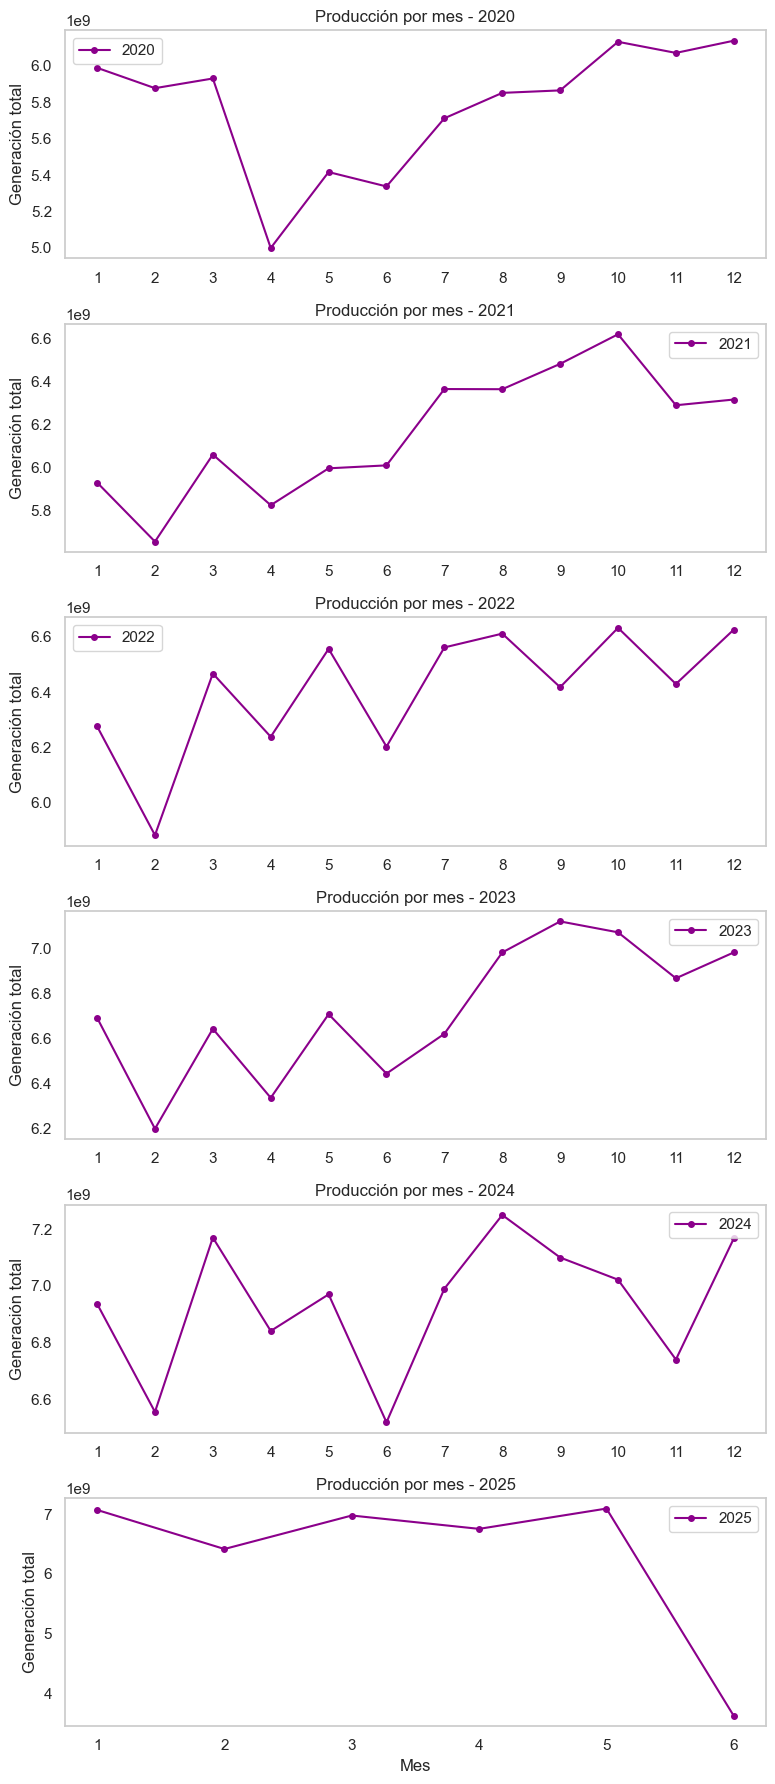

In [45]:
years = sorted(df_monthly["year"].unique())
n_years = len(years)

fig, axes = plt.subplots(n_years, 1, figsize=(8, 3 * n_years)) #sharex=True)

if n_years == 1:
    axes = [axes]  # Ensure axes is iterable

for i, year in enumerate(years):
    ax = axes[i]
    data = df_monthly[df_monthly["year"] == year]
    ax.plot(data["mes"], data["generacion total mes"], 'o-', color='darkmagenta', markersize=4, label=f'{year}')
    ax.set_title(f'Producción por mes - {year}')
    ax.set_xticklabels(np.arange(1, (len(data["mes"]))+1, 1))
    ax.set_ylabel('Generación total')
    ax.legend()
    ax.grid(False)

plt.xlabel('Mes')
plt.tight_layout()
plt.show()

In [43]:
years

['2020', '2021', '2022', '2023', '2024', '2025']

In [28]:
df_clasification = df.groupby("Clasificación")[hour_cols].sum().reset_index()
df_clasification["total"] = df_clasification[hour_cols].sum(axis=1)
df_clasification["porcentaje"] = (df_clasification["total"] / df_clasification["total"].sum()) * 100
df_clasification[["Clasificación","total", "porcentaje"]]


,Clasificación,total,porcentaje
0,AUTOG PEQ. ESCALA,3.759775e+07,0.008908
1,AUTOGENERADOR,2.297777e+09,0.544424
2,CICLO COMBINADO,3.296943e+10,7.811614
3,COGENERADOR,4.314097e+09,1.022161
4,FILO AGUA ESPECIAL,1.267845e+09,0.300397
5,FILO DE AGUA,1.755203e+10,4.158691
6,GEN. DISTRIBUIDA,2.976781e+08,0.070530
7,NORMAL,3.633201e+11,86.083274


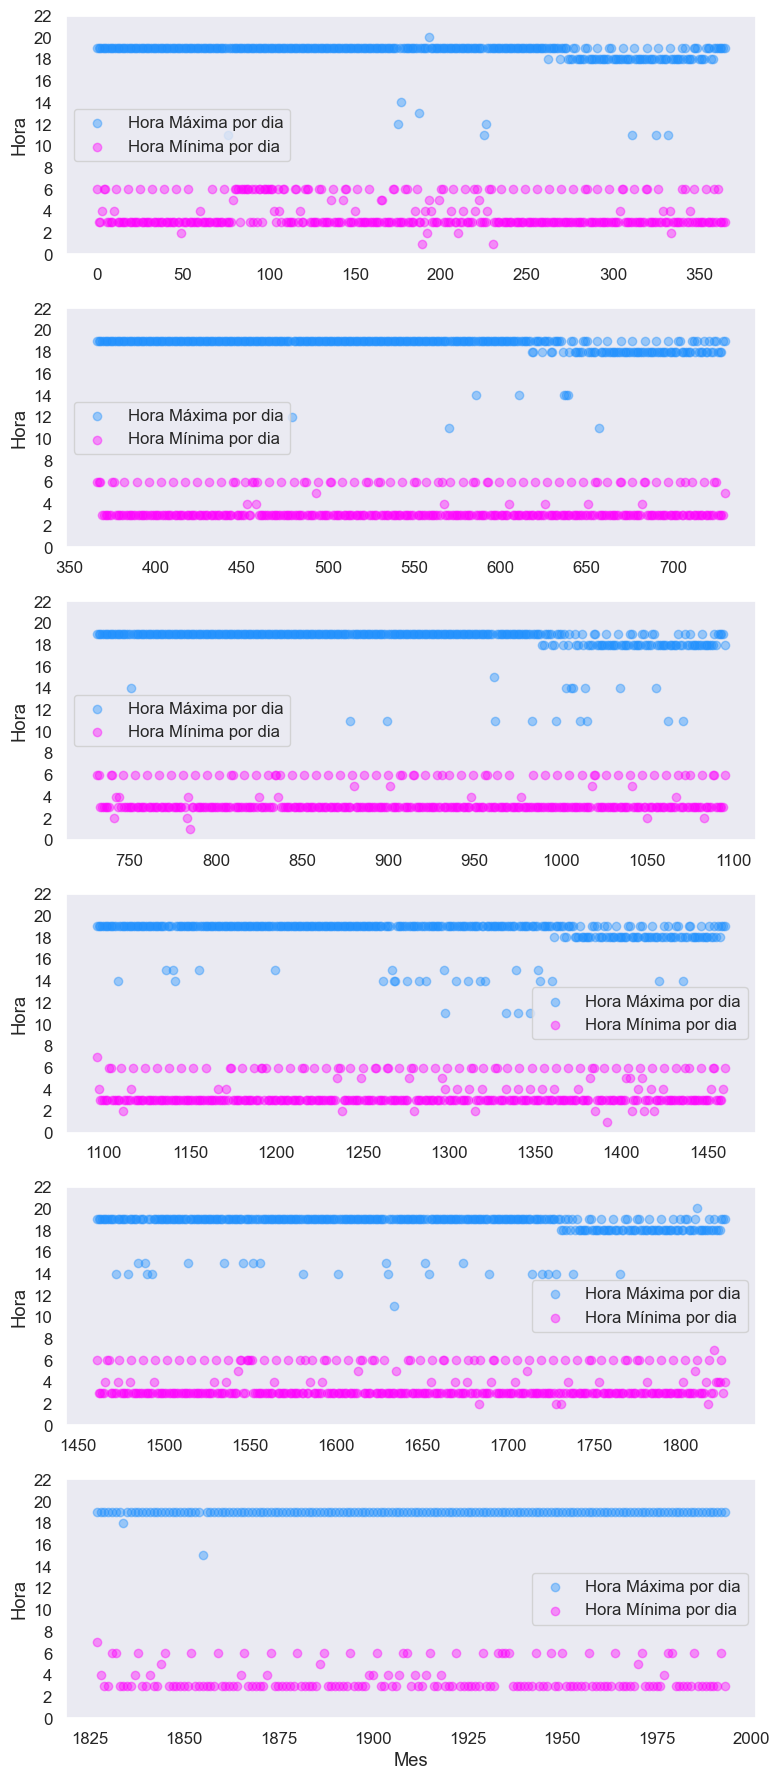

In [29]:
df_grouped["year"] = pd.to_datetime(df_grouped["Fecha"]).dt.to_period("Y")
years = sorted(df_grouped["year"].unique())
n_years = len(years)

fig, axes = plt.subplots(n_years, 1, figsize=(8, 3 * n_years)) #sharex=True)

if n_years == 1:
    axes = [axes]  # Ensure axes is iterable

for i, year in enumerate(years):
    ax = axes[i]
    data = df_grouped[df_grouped["year"] == year]
    ax.scatter(data.index, data["hora max"], marker='o', color='dodgerblue', alpha=0.4,label='Hora Máxima por dia')
    ax.scatter(data.index, data["hora min"], marker='o', color='magenta', alpha=0.4,label='Hora Mínima por dia')
    #ax.set_title(f'Producción por mes - {year}')
    ax.set_ylabel('Hora')
    ax.set_yticks(range(0, 23,2))
    ax.legend()
    ax.grid(False)

plt.xlabel('Mes')
plt.tight_layout()
plt.show()

In [30]:
df.head()

,Fecha,Recurso,Código Recurso,Tipo Generación,Combustible,Código Agente,Tipo Despacho,Es Menor,Clasificación,0,...,17,18,19,20,21,22,23,Version,generacion_total,año
0,2020-01-01,AGPE - ECOPETROL LA HORMIGA,2XXR,TERMICA,GAS,NRCG,NO DESPACHADO CENTRALMENTE,NO,AUTOG PEQ. ESCALA,226.51,...,273.69,227.1,225.26,256.94,155.93,10.91,11.59,TX5,5228.30,2020
1,2020-01-01,AGUA FRESCA,AFR1,HIDRAULICA,AGUA,ADCG,NO DESPACHADO CENTRALMENTE,SI,NORMAL,7268.40,...,6874.80,6802.8,6764.40,6729.60,6714.00,5462.40,5950.80,TX5,167797.20,2020
2,2020-01-01,ALBAN,ALBG,HIDRAULICA,AGUA,EPSG,DESPACHADO CENTRALMENTE,NO,NORMAL,251520.00,...,238960.00,244786.0,246944.00,248476.00,250296.00,250590.00,250340.00,TX5,5868872.00,2020
3,2020-01-01,ALEJANDRÍA,2SDR,HIDRAULICA,AGUA,GALG,NO DESPACHADO CENTRALMENTE,SI,NORMAL,14861.00,...,8525.00,10065.0,12892.00,14839.00,14927.00,14982.00,14872.00,TX5,281369.00,2020
4,2020-01-01,ALTO TULUA,ALTG,HIDRAULICA,AGUA,EPSG,NO DESPACHADO CENTRALMENTE,SI,NORMAL,0.00,...,10911.60,10908.0,10908.00,10915.20,10915.20,10918.80,10922.40,TX5,197923.78,2020


In [31]:
# 1. Define a color map for each combustible
combustibles = df["Combustible"].unique()
color_map = {
    combustible: color for combustible, color in zip(
        combustibles,  # same as `combustibles`
       [
    'deeppink',         # bold pink
    'mediumvioletred',  # deep reddish purple
    'crimson',          # rich red-pink
    'hotpink',          # vibrant pink
    'orchid',           # saturated purple-pink
    'mediumorchid',     # slightly deeper
    'darkmagenta',      # rich magenta
    'purple',           # classic purple
    'blueviolet',       # purplish blue
    'mediumslateblue',  # muted blue-violet
    'slateblue',        # similar but cooler
    'royalblue',        # bright, bold blue
    'dodgerblue',       # energetic light blue
    'mediumblue',       # darker saturated blue
    'teal',             # contrasting, cool
    'indigo'            # deep and intense
]

    )
}


C:\Users\Berlitz Inst\AppData\Local\Temp\ipykernel_6748\1707330569.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=45, ha='right')
C:\Users\Berlitz Inst\AppData\Local\Temp\ipykernel_6748\1707330569.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=45, ha='right')
C:\Users\Berlitz Inst\AppData\Local\Temp\ipykernel_6748\1707330569.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(data.index, rotation=45, ha='right')
C:\Users\Berlitz Inst\AppData\Local\Temp\ipykernel_6748\1707330569.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabe

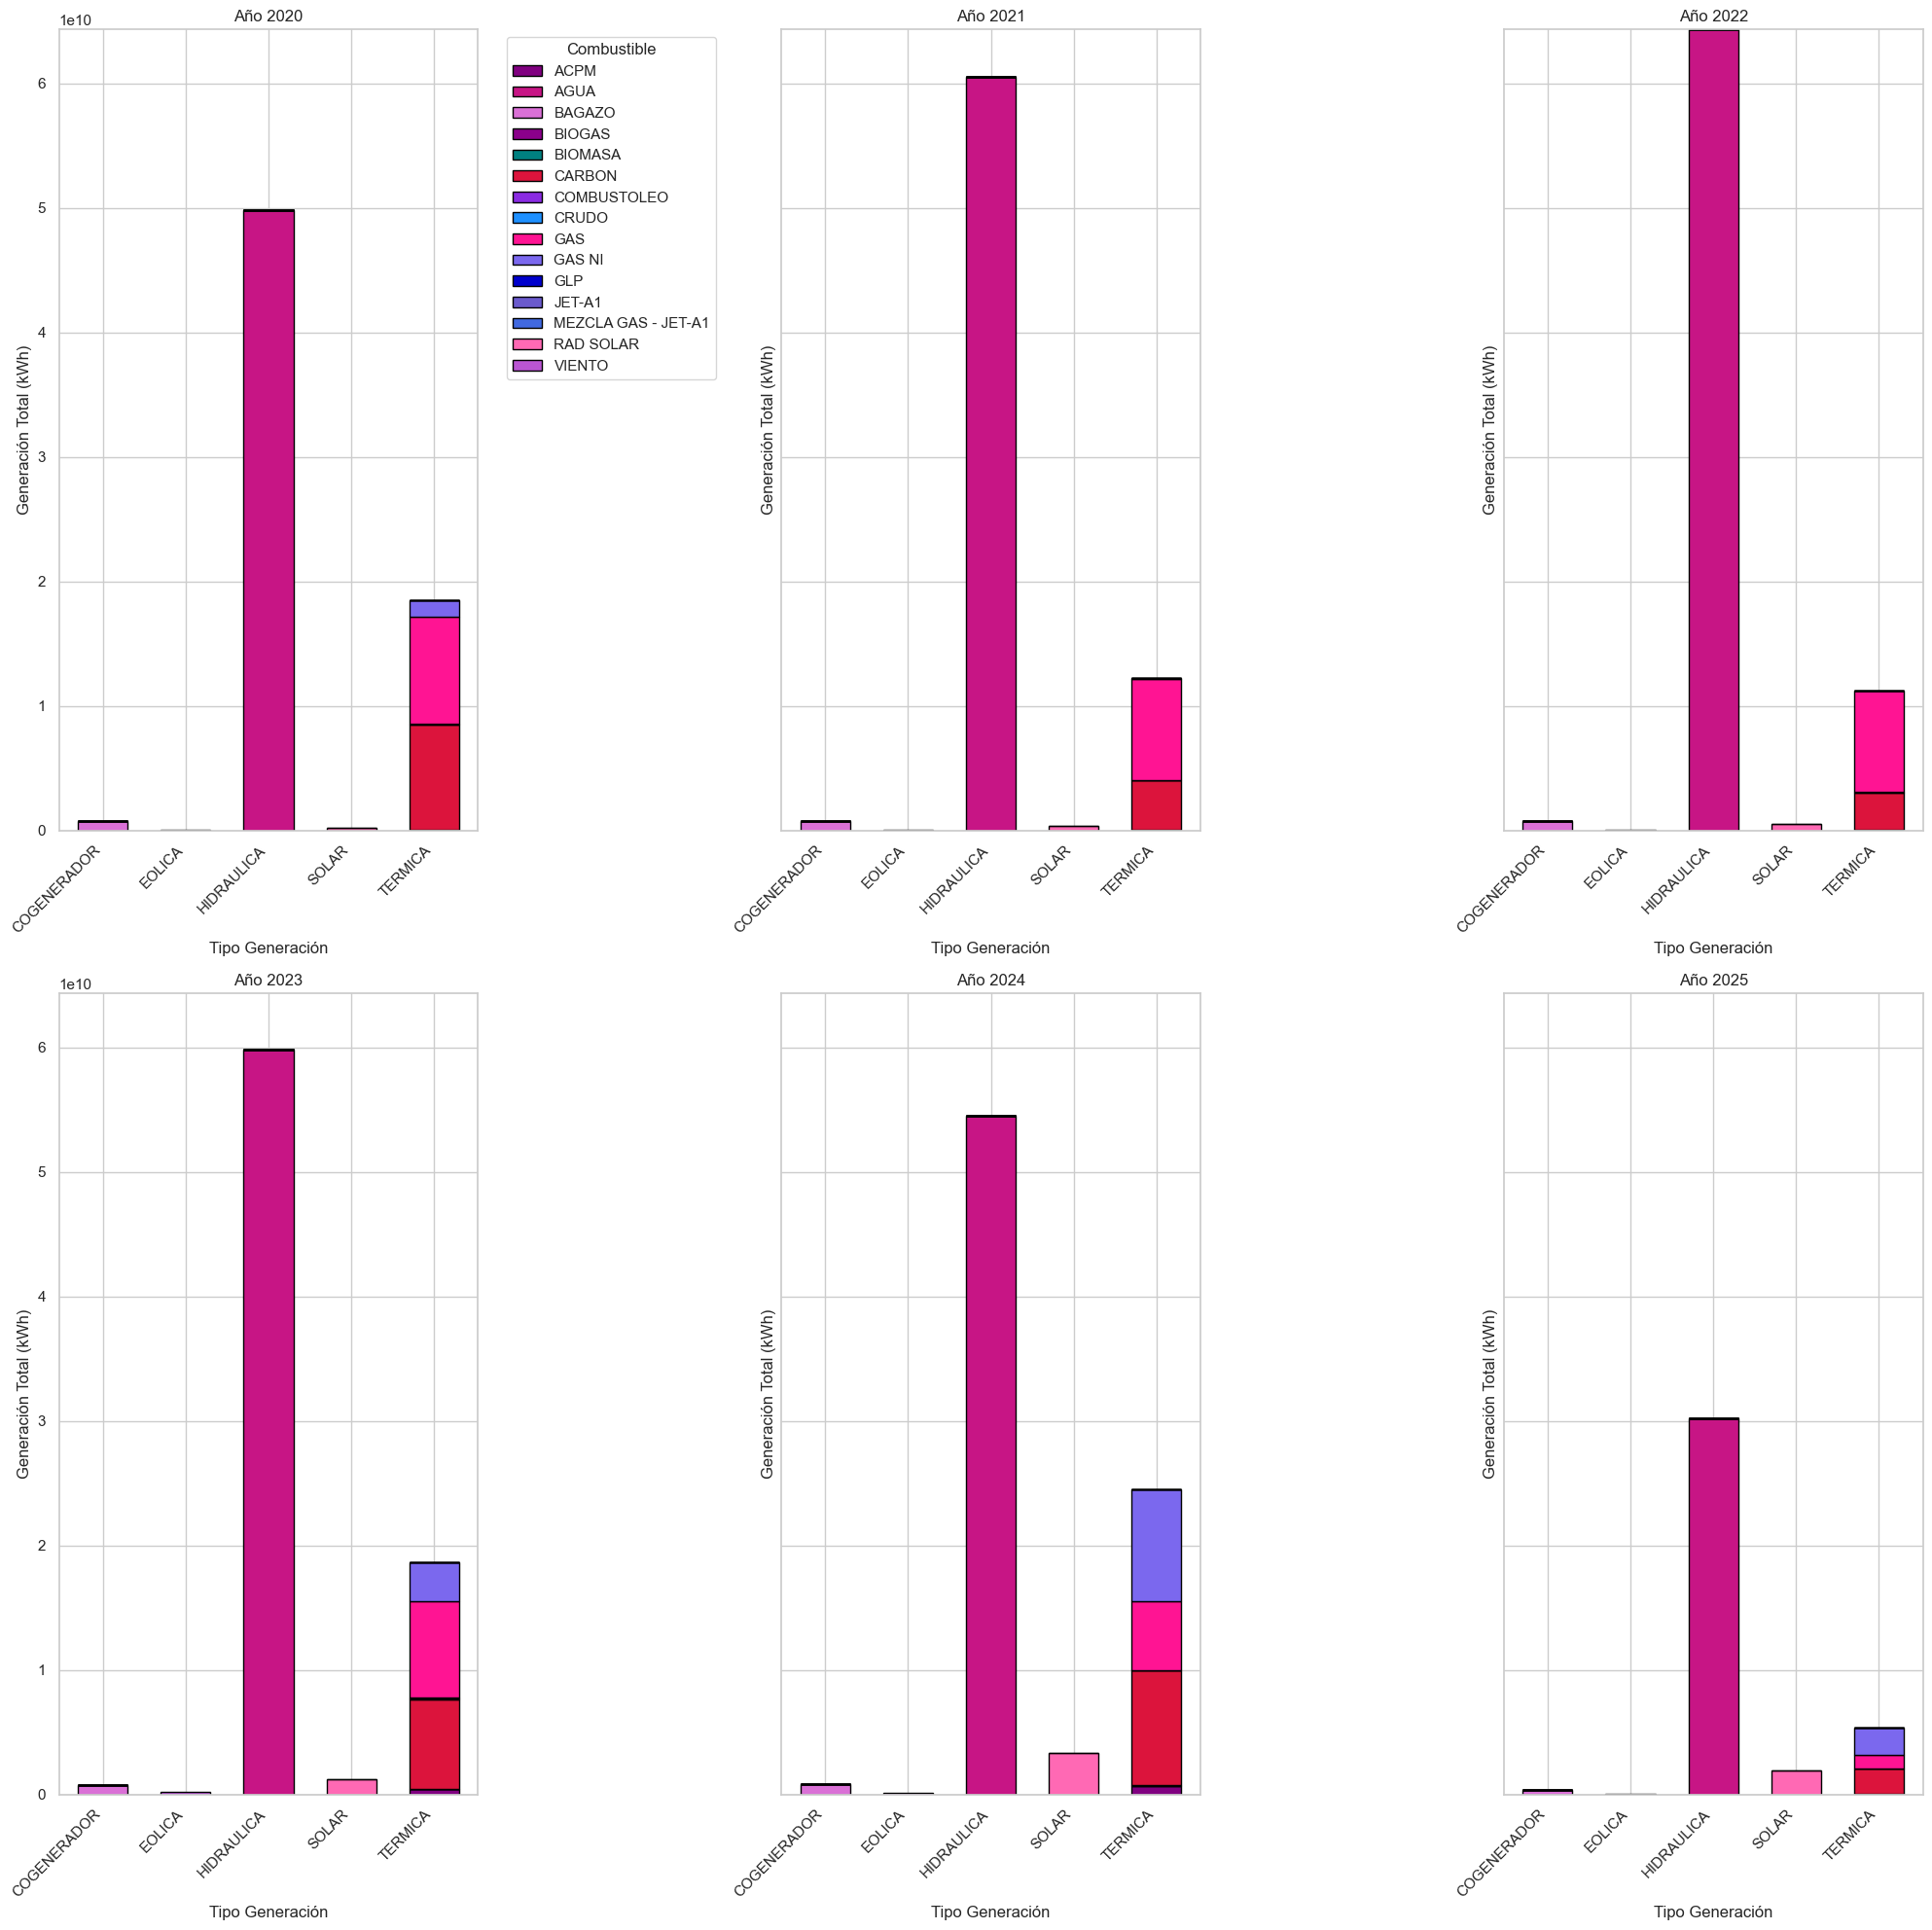

In [39]:
# 1. Agrupa y suma la generación total por año, tipo y combustible
grouped = df.groupby(['año', 'Tipo Generación', 'Combustible'])['generacion_total'].sum().reset_index()

# 2. Calcula el total por año y tipo para obtener el porcentaje
total_tipo = grouped.groupby(['año', 'Tipo Generación'])['generacion_total'].sum().reset_index()
total_tipo = total_tipo.rename(columns={'generacion_total': 'total_tipo'})

grouped = grouped.merge(total_tipo, on=['año', 'Tipo Generación'])
grouped['pct'] = grouped['generacion_total'] / grouped['total_tipo'] * 100

# 3. Pivot para formato apilado
pivot =grouped.pivot_table(index=['año', 'Tipo Generación'], columns='Combustible', values='generacion_total', fill_value=0)

# 4. Gráfico: un grupo por año, barras por tipo, apiladas por combustible
years = sorted(df['año'].unique())
tipos = sorted(df['Tipo Generación'].unique())
combustibles = pivot.columns

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(20, 20), sharey=True)
axes = axes.flatten()  # <-- Add this line

for i, year in enumerate(years):
    ax = axes[i]
    data = pivot.loc[year]
    bottom = np.zeros(len(data))
    for combustible in combustibles:
        ax.bar(
            data.index,
            data[combustible],
            bottom=bottom,
            label=combustible,
            color=color_map[combustible],  # 👈 Use one color per combustible
            edgecolor='black',  # Optional: adds a border to each bar
            width=0.6  # Adjust the width of the bars
        )
        bottom += data[combustible].values
    
    ax.set_title(f'Año {year}')
    ax.set_ylabel('Generación Total (kWh)')
    ax.set_xlabel('Tipo Generación')
    ax.set_xticklabels(data.index, rotation=45, ha='right')
    
    if i == 0:
        ax.legend(title='Combustible', bbox_to_anchor=(1.05, 1), loc='upper left')

        
    

plt.tight_layout()
plt.show()

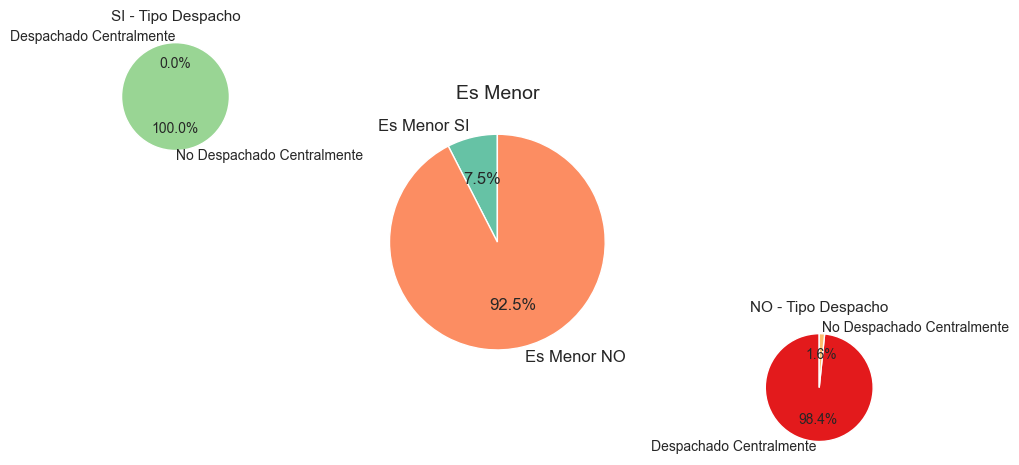

In [33]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Prepare data
df_pie = df.groupby(['Es Menor', 'Tipo Despacho'])['generacion_total'].sum().unstack(fill_value=0)
outer_labels = ['Es Menor SI', 'Es Menor NO']
outer_sizes = df.groupby('Es Menor')['generacion_total'].sum().loc[['SI', 'NO']].values

# For SI
si_sizes = [
    df_pie.loc['SI'].get('DESPACHADO CENTRALMENTE', 0),
    df_pie.loc['SI'].get('NO DESPACHADO CENTRALMENTE', 0)
]
si_labels = ['Despachado Centralmente', 'No Despachado Centralmente']

# For NO
no_sizes = [
    df_pie.loc['NO'].get('DESPACHADO CENTRALMENTE', 0),
    df_pie.loc['NO'].get('NO DESPACHADO CENTRALMENTE', 0)
]
no_labels = ['Despachado Centralmente', 'No Despachado Centralmente']

# Colors
main_colors = ['#66c2a5', '#fc8d62']
si_colors = ['#3288bd', '#99d594']
no_colors = ['#e31a1c', '#fdbf6f']

# Layout
fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 2, 1])

# Main pie (center)
ax_main = plt.subplot(gs[:, 1])
wedges, texts, autotexts = ax_main.pie(
    outer_sizes, labels=outer_labels, autopct='%1.1f%%', colors=main_colors, startangle=90, textprops={'fontsize': 12}
)
ax_main.set_title('Es Menor', fontsize=14)

# Left pie (SI)
ax_si = plt.subplot(gs[0, 0])
ax_si.pie(
    si_sizes, labels=si_labels, autopct='%1.1f%%', colors=si_colors, startangle=90, textprops={'fontsize': 10}
)
ax_si.set_title('SI - Tipo Despacho', fontsize=11)

# Right pie (NO)
ax_no = plt.subplot(gs[1, 2])
ax_no.pie(
    no_sizes, labels=no_labels, autopct='%1.1f%%', colors=no_colors, startangle=90, textprops={'fontsize': 10}
)
ax_no.set_title('NO - Tipo Despacho', fontsize=11)

plt.tight_layout()
plt.show()

In [34]:
with pd.ExcelWriter('generacion_energía(kWh)_2020_2025.xlsx') as writer:
    df.to_excel(writer, sheet_name='Raw Data', index=False)
    df_grouped.to_excel(writer, sheet_name='Por Día', index=False)
    df_monthly.to_excel(writer, sheet_name='Por Mes', index=False)
    df_yearly.to_excel(writer, sheet_name='Por Año', index=False)
    summary.to_excel(writer, sheet_name='Por Tipo', index=False)

In [35]:
print(df.columns, "\n", df_grouped.columns, "\n", df_monthly.columns, "\n", df_yearly.columns, "\n", summary.columns)

Index(['Fecha', 'Recurso', 'Código Recurso', 'Tipo Generación', 'Combustible',
       'Código Agente', 'Tipo Despacho', 'Es Menor', 'Clasificación', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14',
       '15', '16', '17', '18', '19', '20', '21', '22', '23', 'Version',
       'generacion_total', 'año'],
      dtype='object') 
 Index(['Fecha', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       'max', 'hora max', 'min', 'hora min', 'avg', 'consumo total dia',
       'year_month', 'year'],
      dtype='object') 
 Index(['mes', 'generacion total mes', 'día de maxima generación',
       'máxima generación', 'día de minima generación', 'minima generación',
       'year'],
      dtype='object') 
 Index(['año', 'mes de maxima generación', 'max total mes',
       'día de maxima generación', 'máxima generación día',
       'mes de minima generación', 'min total m